# <span style="color:">CREDIT RISK ANALYSIS FOR LOAN APPROVAL</span>

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
Dataset=pd.read_csv("credit_risk.csv")
Dataset

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [3]:
Dataset.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [4]:
Dataset.tail()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26
32580,32780,66,42000,RENT,2.0,MEDICAL,6475,9.99,0,0.15,N,30


In [5]:
Dataset.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
Dataset.describe(include="all")

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
count,32581.000000,32581.000000,3.258100e+04,32581,31686.000000,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,NaN,4,NaN,6,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,RENT,NaN,EDUCATION,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,NaN,16446,NaN,6453,NaN,NaN,NaN,NaN,26836,NaN
mean,16290.006139,27.734600,6.607485e+04,NaN,4.789686,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,9405.479594,6.348078,6.198312e+04,NaN,4.142630,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,0.000000,20.000000,4.000000e+03,NaN,0.000000,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,8145.000000,23.000000,3.850000e+04,NaN,2.000000,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,16290.000000,26.000000,5.500000e+04,NaN,4.000000,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,24435.000000,30.000000,7.920000e+04,NaN,7.000000,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [7]:
Dataset.columns

Index(['Id', 'Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Status', 'Percent_income', 'Default', 'Cred_length'],
      dtype='object')

In [8]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [9]:
Dataset.shape

(32581, 12)

In [10]:
print("Rows are:",Dataset.shape[0])
print("Columns are:",Dataset.shape[1])

Rows are: 32581
Columns are: 12


In [11]:
Dataset.isnull().value_counts()

Id     Age    Income  Home   Emp_length  Intent  Amount  Rate   Status  Percent_income  Default  Cred_length
False  False  False   False  False       False   False   False  False   False           False    False          28638
                                                         True   False   False           False    False           3048
                             True        False   False   False  False   False           False    False            827
                                                         True   False   False           False    False             68
Name: count, dtype: int64

In [12]:
null_values=Dataset.isnull()
null_values.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
Dataset["Default"].value_counts()

Default
N    26836
Y     5745
Name: count, dtype: int64

In [14]:
Dataset.duplicated().sum()            # no duplicate values
 

0

In [15]:
Dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Length: 32581, dtype: bool

In [16]:
Dataset.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [17]:
for column in null_values.columns.values.tolist():
    print(column)
    print (null_values[column].value_counts())
    print("")

Id
Id
False    32581
Name: count, dtype: int64

Age
Age
False    32581
Name: count, dtype: int64

Income
Income
False    32581
Name: count, dtype: int64

Home
Home
False    32581
Name: count, dtype: int64

Emp_length
Emp_length
False    31686
True       895
Name: count, dtype: int64

Intent
Intent
False    32581
Name: count, dtype: int64

Amount
Amount
False    32581
Name: count, dtype: int64

Rate
Rate
False    29465
True      3116
Name: count, dtype: int64

Status
Status
False    32581
Name: count, dtype: int64

Percent_income
Percent_income
False    32581
Name: count, dtype: int64

Default
Default
False    32581
Name: count, dtype: int64

Cred_length
Cred_length
False    32581
Name: count, dtype: int64



In [18]:
null_values.sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [19]:
 for col in Dataset.columns:
    if Dataset[col].dtype == 'float64' or Dataset[col].dtype == 'int64':
        Dataset[col].fillna(Dataset[col].mean(), inplace=True)
for col in Dataset.columns:
    if Dataset[col].dtype == 'object':
        Dataset[col].fillna(Dataset[col].mode()[0], inplace=True)
print(Dataset.isnull().sum())


Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64


In [20]:
Dataset["Status"].value_counts()


Status
0    25473
1     7108
Name: count, dtype: int64

<Axes: xlabel='Status', ylabel='count'>

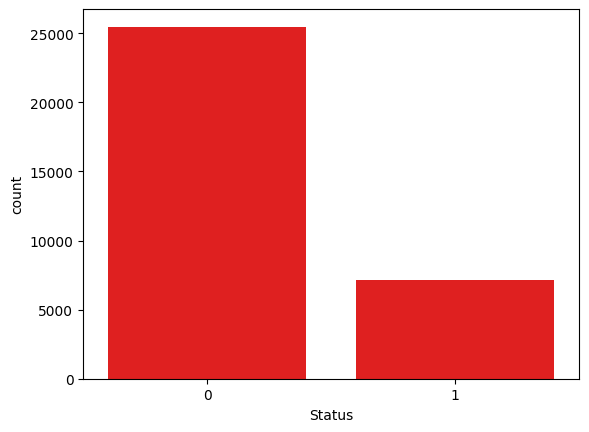

In [21]:
sns.countplot(x=Dataset["Status"],color="red")

In [22]:
 Dataset.head()


,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


<Axes: xlabel='Default', ylabel='count'>

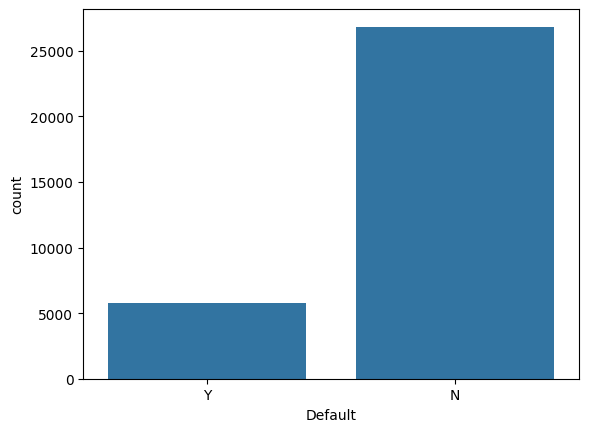

In [23]:
sns.countplot(x=Dataset["Default"]) 


<Axes: xlabel='Home', ylabel='count'>

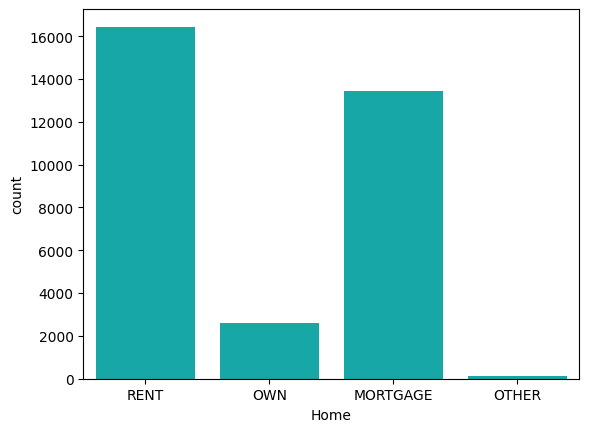

In [24]:
 sns.countplot(x=Dataset["Home"],color="c")

C:\Users\PMLS\AppData\Local\Temp\ipykernel_25708\874668304.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Dataset["Intent"],palette="colorblind")


<Axes: xlabel='Intent', ylabel='count'>

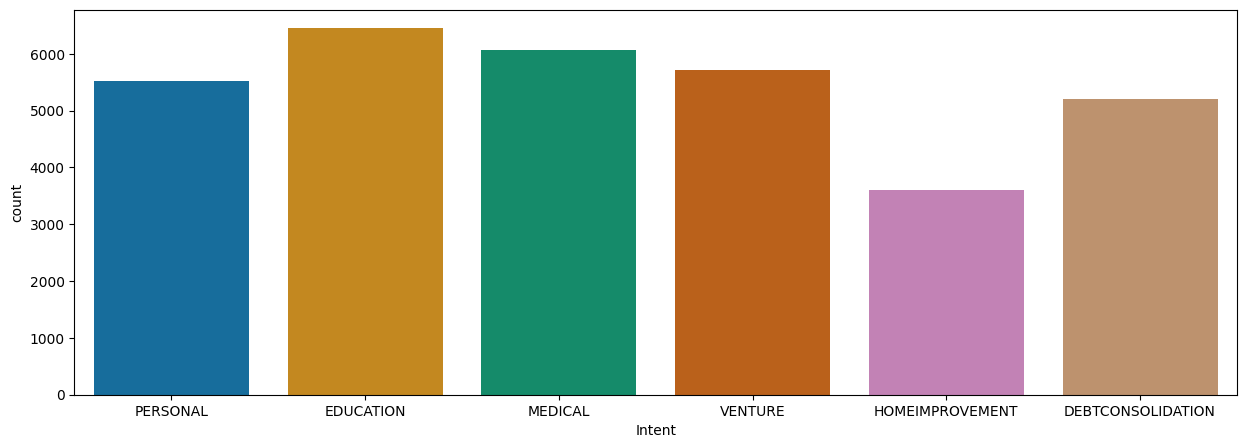

In [25]:
fig,ax=plt.subplots(figsize=(15,5))
sns.countplot(x=Dataset["Intent"],palette="colorblind") 


<Axes: xlabel='Amount', ylabel='Count'>

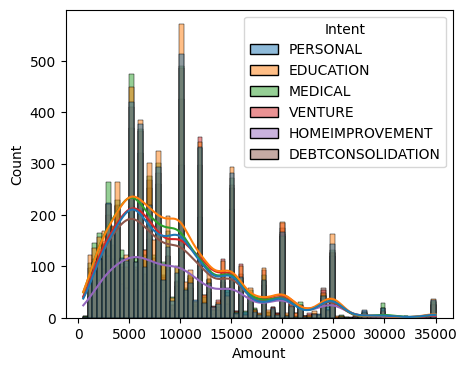

In [26]:
fig ,ax=plt.subplots(figsize=(5,4))
sns.histplot(data=Dataset,x="Amount",hue="Intent",kde=True,ax=ax)
 

<Axes: xlabel='Age', ylabel='Income'>

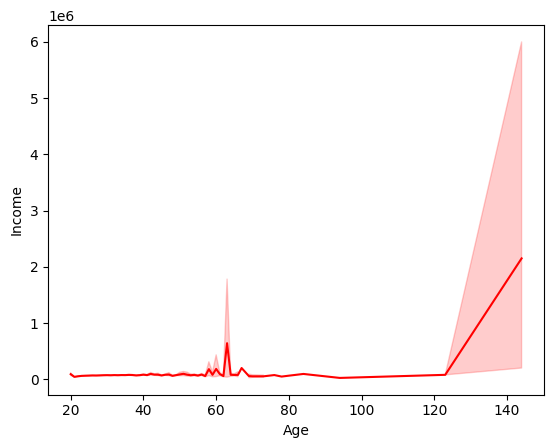

In [27]:
sns.lineplot(data=Dataset,x="Age",y="Income",color="r")

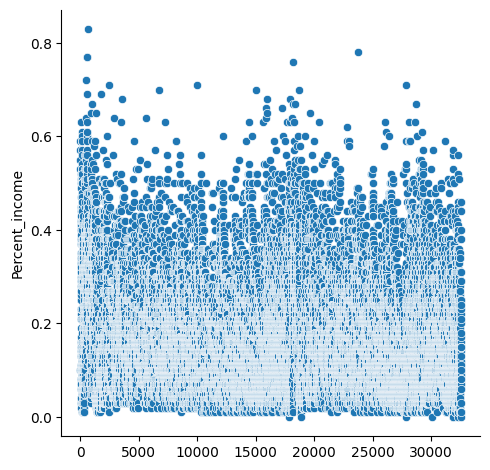

In [28]:
sns.relplot(Dataset["Percent_income"])

In [29]:
Label=LabelEncoder()
objlist=Dataset.select_dtypes(include="object").columns

for obj in objlist:
    Dataset[obj]=Label.fit_transform(Dataset[obj].astype(str))
Dataset.sample(10)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
10448,10448,26,30000,3,1.000000,0,10000,6.99,1,0.33,0,4
27176,27176,30,24000,2,4.789686,4,6000,5.79,0,0.25,0,9
4140,4140,23,40000,0,7.000000,1,6000,14.79,0,0.15,0,2
13074,13074,23,87600,0,7.000000,3,20000,13.35,0,0.23,1,4
20772,20772,29,41000,3,3.000000,4,5000,11.49,0,0.12,0,9
29892,29892,46,40452,2,4.000000,1,4000,11.71,0,0.10,0,17
15618,15618,25,86004,3,1.000000,4,15000,12.53,0,0.17,1,4
15583,15583,22,148000,0,6.000000,0,15000,7.66,0,0.10,0,4
9241,9241,23,24000,3,4.000000,4,5000,6.62,0,0.21,0,4
2450,2450,22,19200,3,3.000000,3,2850,15.27,0,0.15,1,4


array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Home'}>,
        <Axes: title={'center': 'Emp_length'}>,
        <Axes: title={'center': 'Intent'}>],
       [<Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'Rate'}>,
        <Axes: title={'center': 'Status'}>],
       [<Axes: title={'center': 'Percent_income'}>,
        <Axes: title={'center': 'Default'}>,
        <Axes: title={'center': 'Cred_length'}>]], dtype=object)

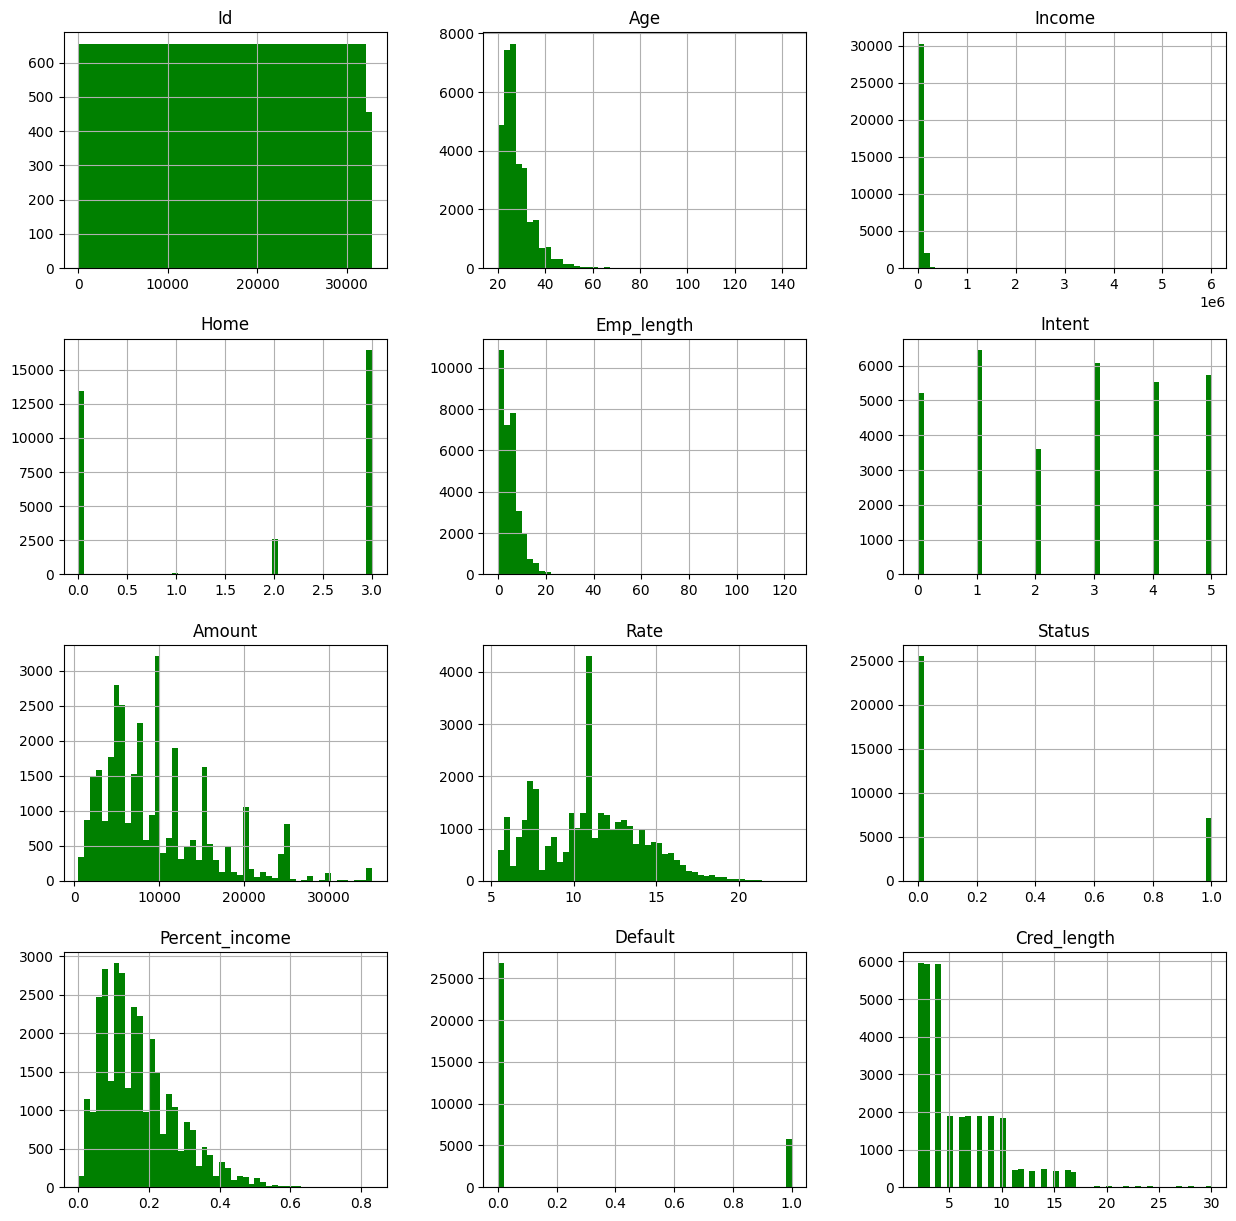

In [30]:
Dataset.hist(bins=50,figsize=(15,15),color="g")

<Axes: >

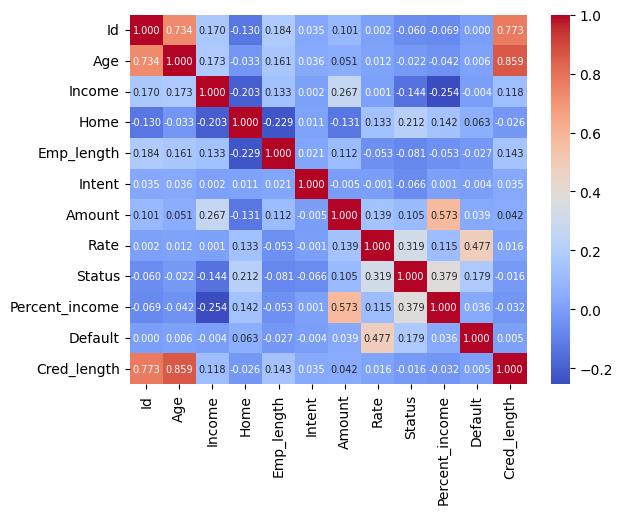

In [31]:
corr=Dataset.corr()
custom_palette = "coolwarm"
sns.heatmap(corr, annot=True,fmt="0.3f",annot_kws={"size":7},cmap=custom_palette)

In [32]:
X,y=Dataset.drop(["Status"],axis=1),Dataset[["Status"]]

In [33]:
Dataset.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,3,123.0,4,35000,16.02,1,0.59,1,3
1,1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2
2,2,25,9600,0,1.0,3,5500,12.87,1,0.57,0,3
3,3,23,65500,3,4.0,3,35000,15.23,1,0.53,0,2
4,4,24,54400,3,8.0,3,35000,14.27,1,0.55,1,4


In [34]:
y

,Status
0,1
1,0
2,1
3,1
4,1
...,...
32576,0
32577,0
32578,1
32579,0


In [35]:
X

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default,Cred_length
0,0,22,59000,3,123.0,4,35000,16.02,0.59,1,3
1,1,21,9600,2,5.0,1,1000,11.14,0.10,0,2
2,2,25,9600,0,1.0,3,5500,12.87,0.57,0,3
3,3,23,65500,3,4.0,3,35000,15.23,0.53,0,2
4,4,24,54400,3,8.0,3,35000,14.27,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,0,1.0,4,5800,13.16,0.11,0,30
32577,32577,54,120000,0,4.0,4,17625,7.49,0.15,0,19
32578,32578,65,76000,3,3.0,2,35000,10.99,0.46,0,28
32579,32579,56,150000,0,5.0,4,15000,11.48,0.10,0,26


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
X_train.size,X_test.size,y_train.size,y_test.size

(250866, 107525, 22806, 9775)

## Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
LG= LogisticRegression()
LG

LogisticRegression()

In [100]:
LG.fit(X_train,y_train)

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [101]:
LG.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
LG_Score=LG.score(X_test,y_test)
LG_Score

0.8234271099744246

## Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=200)
RF

RandomForestClassifier(n_estimators=200)

In [104]:
RF.fit(X_train,y_train)

C:\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=200)

In [130]:
RF_predict=RF.predict(X_test)

In [131]:
Rf_Score=RF.score(X_test , y_test)
Rf_Score

0.9114066496163683

## SVM

In [132]:
from sklearn.svm import SVC
svm=SVC()

In [133]:
SVC()

SVC()

In [134]:
svm.fit(X_train,y_train)

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [135]:
svm.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [136]:
svm_score=svm.score(X_test,y_test)
svm_score 


0.8036828644501279

## Decision Tree

In [137]:
DT=DecisionTreeClassifier()
DT

DecisionTreeClassifier()

In [138]:
DT

DecisionTreeClassifier()

In [139]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [140]:
DT.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [141]:
DT_Score=DT.score(X_test,y_test)
DT_Score

0.8723273657289002

# Accuracy

In [142]:
print("Accuracy of Decision Tree is:",DT_Score)
print("Accuracy of Logistic Regression is:",LG_Score)
print("Accuracy of Random Forest is:",Rf_Score)
print("Accuracy of SVM is:",svm_score )



Accuracy of Decision Tree is: 0.8723273657289002
Accuracy of Logistic Regression is: 0.8234271099744246
Accuracy of Random Forest is: 0.9114066496163683
Accuracy of SVM is: 0.8036828644501279


#### In this comparison of machine learning models, the Random Forest classifier achieved the highest accuracy of 91.14%. Random Forest is known for its robustness to overfitting, as it combines multiple decision trees to make predictions, reducing variance and increasing accuracy. With its superior performance in this evaluation, Random Forest emerges as the best model among the ones tested. Its ensemble approach harnesses the collective wisdom of multiple decision trees, resulting in a more reliable and accurate predictive model for the given dataset.

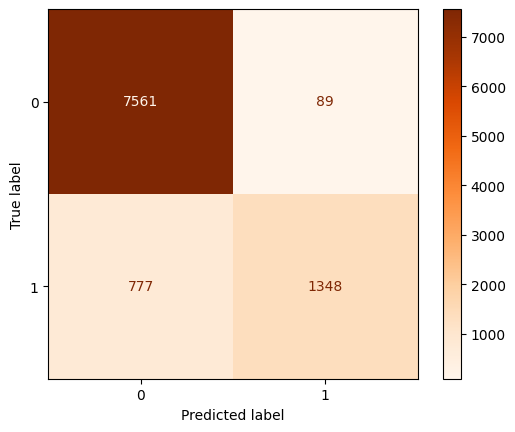

In [145]:
ConfusionMatrixDisplay.from_predictions(y_test,RF_predict,cmap="Oranges",normalize=None,display_labels=["0","1"])